<h1>
    Thermodynamics of Materials AD19: <br>
    <b>Homework 10</b>
</h1>

<table width="75%" align="center">
    <tr>
        <th align="left" colspan="2">
            <h2><b>Team<b>:</b></h2>
        </th>
    </tr>
    <tr>
        <td><h3>Antonio Osamu Katagiri Tanaka</h3></td>
        <td><h4>A01212611@itesm.mx</h4></td>
    </tr>
</table>

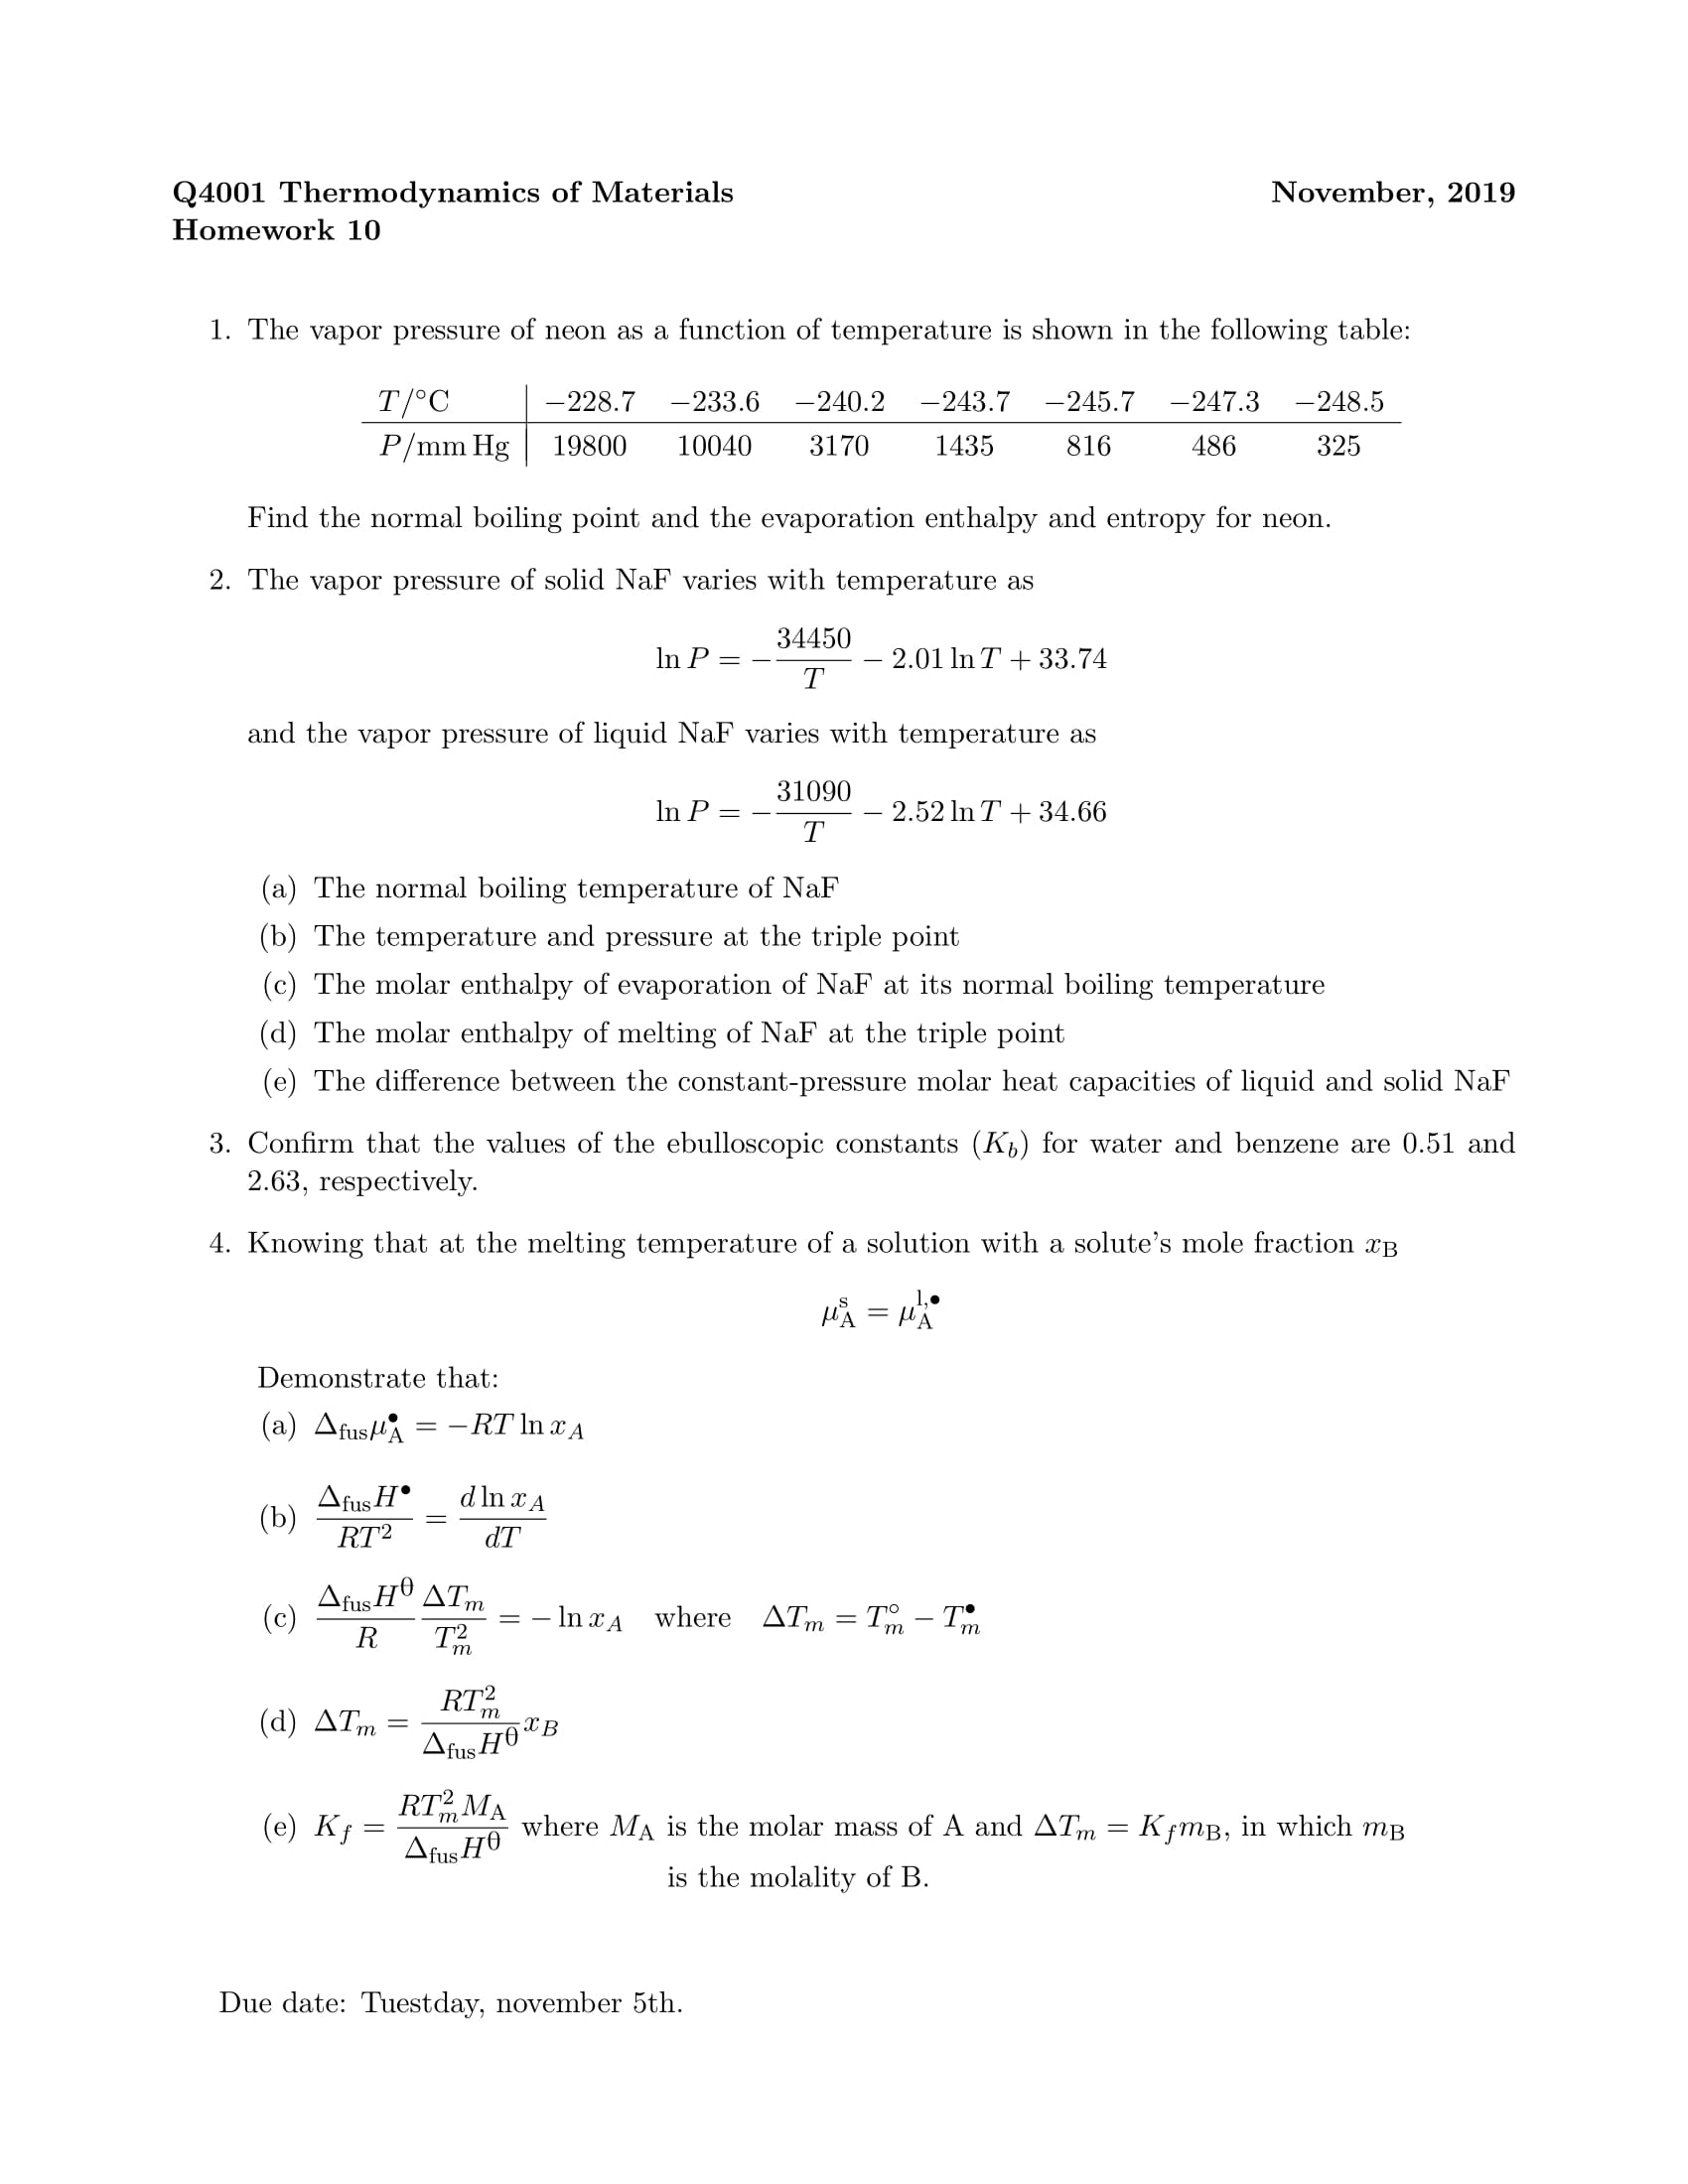

In [87]:
#******************************************************************************#
# Futures
%matplotlib inline
# from __future__ import unicode_literals
# from __future__ import print_function

# Generic/Built-in
import datetime
import argparse

import numpy as np
np.seterr(invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
import statsmodels.api as sm

from scipy import special, optimize
from IPython.display import display, Image
from statsmodels.stats.outliers_influence import summary_table
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
  
# Owned
pfont = {'fontname':'Consolas'};
# from nostalgia_util import log_utils
# from nostalgia_util import settings_util
__authors__   = ["Osamu Katagiri - A01212611@itesm.mx"]
__copyright__ = "None"
__credits__   = ["Marcelo Videa - mvidea@itesm.mx"]
__license__   = "None"
__status__    = "Under Work"
#******************************************************************************#
display(Image(filename='./directions/0.jpg'))

---
# Exercise 1

The vapour pressure $P$ of neon as a function of temperature T is as follows:

As depicted by Yates [1], the data is a selection of those that were obtained from a fitted expression of the form
$$ Log\left(\frac{P}{mmHg}\right) = \frac{0.05223A}{T} + B + CT $$
[1] Yates, P. (2007). Chemical Calculations. Boca Raton: CRC Press, https://doi.org/10.1201/9781420008654

In [197]:
def fittedExpression_(T, A, B, C):
    res = np.exp(((0.05223*A)/T) + (B) + (C*T))
    return np.log10(res);

# intialise data of lists. 
data = {'T':[-228.7, -233.6, -240.2, -243.7, -245.7, -247.3, -248.5],
        'P':[ 19800,  10040,   3170,   1435,    816,    486,    325]} 
  
# Create DataFrame 
df = pd.DataFrame(data)

display(df.T)

0        1       2       3      4      5      6
T   -228.7   -233.6  -240.2  -243.7 -245.7 -247.3 -248.5
P  19800.0  10040.0  3170.0  1435.0  816.0  486.0  325.0

A = 1490597.2
B = 710.07
C = 1.57


<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

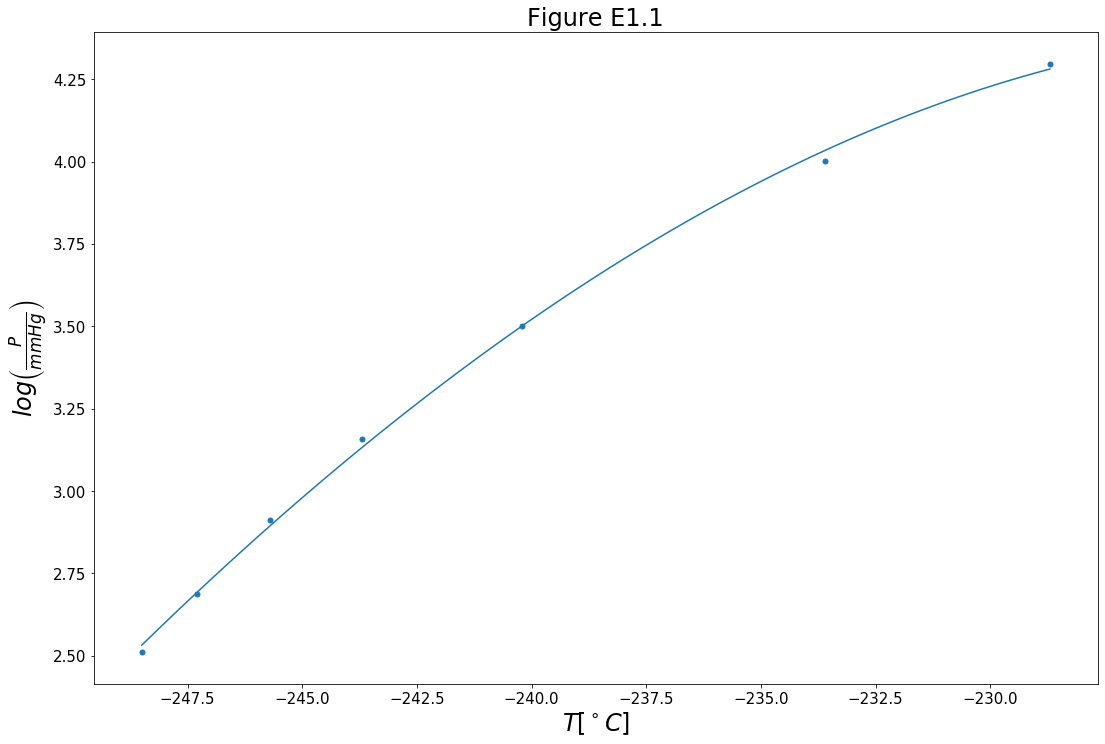

In [198]:
df = df.sort_values(by=['P']);
P  = df.iloc[:]['P'];
T  = df.iloc[:]['T'];
y = np.log10(np.array(P));
x = np.array(T);

# constants
A = -1615.5 #K
B = 5.69991
C = 0.0111800 #1/K

# FIT the Clausius-Clapeyron Equation to the data
p0 = A, B, C
results = optimize.curve_fit(fittedExpression_, x, y, p0)
A = results[0][0];
B = results[0][1];
C = results[0][2];
print('A =', round(A,2))
print('B =', round(B,2))
print('C =', round(C,2))

# PLOT
scale = 6;
plt.subplots(figsize=(3*scale, 2*scale));

# Plot
T2 = np.linspace(max(x), min(x), 100)
P2 = fittedExpression_(T2, A, B, C)
plt.plot(T2, P2, zorder=0)
plt.scatter(x, y, s=25, label='data', zorder=2);

# Display plots
plt.yscale('linear');
plt.xlabel(r'$T[^\circ C]$', fontsize=24);
plt.ylabel(r'$log\left(\frac{P}{mmHg}\right)$', fontsize=24);
plt.title('Figure E1.1', size=24);
#plt.legend(prop={'size': 18});
display(plt);

At the standard pressure $P^\circ = 1 atm$, a liquid boils at its normal boiling point, $T_b$.

Starting from the Clausiusâ€“Clapeyron equation
$$ ln\left(\frac{P_2}{P_1}\right) = \frac{\Delta H_{vap}}{R} \left(\frac{1}{T_1} - \frac{1}{T_2}\right) $$

If $P_1 = P^\circ$,  $T_1 = T_b$, $P_2 = P$ and  $T_2 = T$
$$ ln\left(\frac{P}{P^\circ}\right) = \frac{\Delta H_{vap}}{R} \left(\frac{1}{T_b} - \frac{1}{T}\right) $$
$$ ln\left(\frac{P}{P^\circ}\right) = \frac{\Delta H_{vap}}{R T_b} - \frac{\Delta H_{vap}}{R T} $$
$$ ln\left(\frac{P}{P^\circ}\right) = - \frac{\Delta H_{vap}}{R} \left(\frac{1}{T}\right) + \frac{\Delta H_{vap}}{R T_b} $$

If $y = mx +c$, then:
$$ x = \frac{1}{T} $$
$$ y = ln\left(\frac{P}{P^\circ}\right) $$
$$ m = -\frac{\Delta H_{vap}}{R} $$
$$ c = \frac{\Delta H_{vap}}{R T_b} $$

By ploting $x$ vs. $y$, a straight line will be obtained with gradient $-\frac{\Delta H_{vap}}{R}$ and intercept $\frac{\Delta H_{vap}}{R T_b}$

c = 8.33476916973932
m = -226.82619930886526


<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

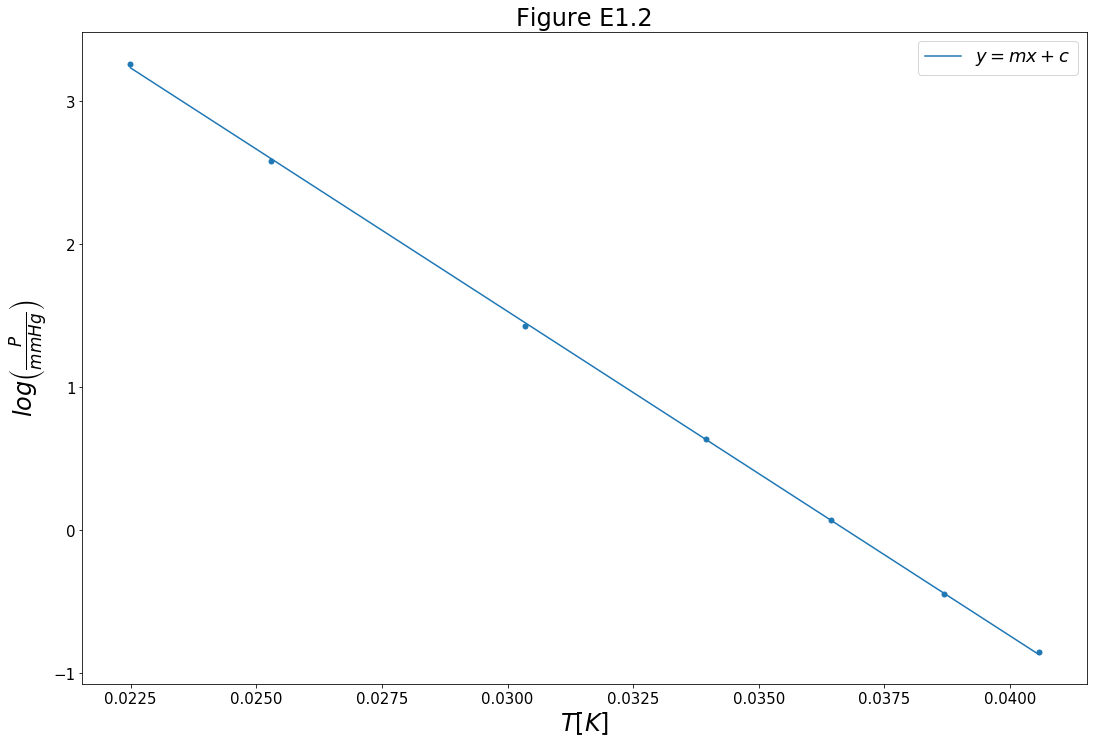

In [220]:
df = df.sort_values(by=['P']);
P  = df.iloc[:]['P'];
T  = df.iloc[:]['T'];

# constants
x = 1/(np.array(T)+273.15);  #1/K
y = np.log(np.array(P)/760); #<na>

# Linear Regression
# X is the independent variable (bivariate in this case)
X = np.array([x])
# Y is the dependent data
Y = y
# generate a model of polynomial features
poly = PolynomialFeatures(degree=1)
# transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
X_ = poly.fit_transform(X)
# generate the regression object
clf = LinearRegression()
# perform the actual regression
clf = clf.fit(np.transpose(X), Y)
c = clf.intercept_
m = clf.coef_[0]
print('c =', c)
print('m =', m)

# PLOT
scale = 6;
plt.subplots(figsize=(3*scale, 2*scale));

# Plot
plt.plot(x, m*x + c, label=r'$y = mx + c$', zorder=0)
plt.scatter(x, y, s=25, zorder=0);

# Display plots
plt.yscale('linear');
plt.xlabel(r'$T[K]$', fontsize=24);
plt.ylabel(r'$log\left(\frac{P}{mmHg}\right)$', fontsize=24);
plt.title('Figure E1.2', size=24);
plt.legend(prop={'size': 18});
display(plt);

In [229]:
R = 8.31446261815324; #J/C mol

H_vap = -(m)*R;
print('H_vap =', round(H_vap,2), 'J/mol')

Tb = H_vap/(c*R);
print('Tb =', round(Tb,2), 'K')

S_vap = H_vap/Tb;
print('S_vap =', round(S_vap,2), 'J/molK')

H_vap = 1885.94 J/mol
Tb = 27.21 K
S_vap = 69.3 J/molK


If $ m = -\frac{\Delta H_{vap}}{R} [K] $ then,
$$ \Delta H_{vap} = -m R [J mol^{-1}] $$
$$ \Delta H_{vap} = -(-226.83) 8.31 [J mol^{-1}] $$
<div class="alert alert-block alert-info">
$$ \Delta H_{vap} = 1885.94 [J mol^{-1}]$$
</div>

If $ c = \frac{\Delta H_{vap}}{R T_b} $ then,
$$ T_b = \frac{\Delta H_{vap}}{cR} [K] $$
$$ T_b = \frac{1885.94}{8.33(8.31)} [K] $$
<div class="alert alert-block alert-info">
$$ T_b = 27.21 [K] $$
</div>

The absolute temperature T at which equilibrium occurs in a system is given by
$$ T = \frac{\Delta H}{\Delta S} $$

If $T = T_b$, $\Delta H = \Delta H_{vap}$ and $\Delta S = \Delta S_{vap}$
$$ \Delta S_{vap} = \frac{\Delta H_{vap}}{T_b} $$
$$ \Delta S_{vap} = \frac{1885.94}{27.21} [J mol^{-1} K^{-1}] $$
<div class="alert alert-block alert-info">
$$ \Delta S_{vap} = 69.3 [J mol^{-1} K^{-1}] $$
</div>

---
# Exercise 2a

---
# Exercise 2b

---
# Exercise 2c

---
# Exercise 2d

---
# Exercise 2e

---
# Exercise 3

---
# Exercise 4a

---
# Exercise 4b

---
# Exercise 4c

---
# Exercise 4d

---
# Exercise 4e